$\large\text{В этом нотбуке я разберу работу нейронной сети на конкретной задаче и поясню все основные моменты устройства}$ $\large\text{нейронной сети}$

***

## $\Large \text{Libraries}$

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import seaborn as sns
import sklearn

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

## $\large \text{plt settings}$

In [ ]:
plt.style.use('default')
sns.set(rc={'figure.figsize':(8, 6)})
sns.set_style('white')
sns.despine()

## $\Large \text{Data}$

In [108]:
url = 'https://raw.githubusercontent.com/tsebaka/ML-practice/main/Neural%20Networks/data.csv'
data = pd.read_csv(url)

In [109]:
data

,x,y,class
0,3.238258,0.795599,1
1,4.189054,1.631411,-1
2,4.214798,0.019202,1
3,4.432564,0.586037,-1
4,3.503429,0.496178,1
...,...,...,...
2995,4.149008,1.004875,-1
2996,2.632955,0.136764,1
2997,2.805922,1.457728,-1
2998,3.217395,1.425684,1


$\large\text{Данные представляют собой набор точек на плоскости и принадлежность каждой из них к одному из классов (1 или -1).}$ $\large\text{Датасет был сгенерирован лично мной, поэтому предобрабатывать его не нужно}$

In [110]:
from sklearn.model_selection import train_test_split

y = data['class']

X = data.drop(columns='class')

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

$\large\text{Посмотрим на данные}$

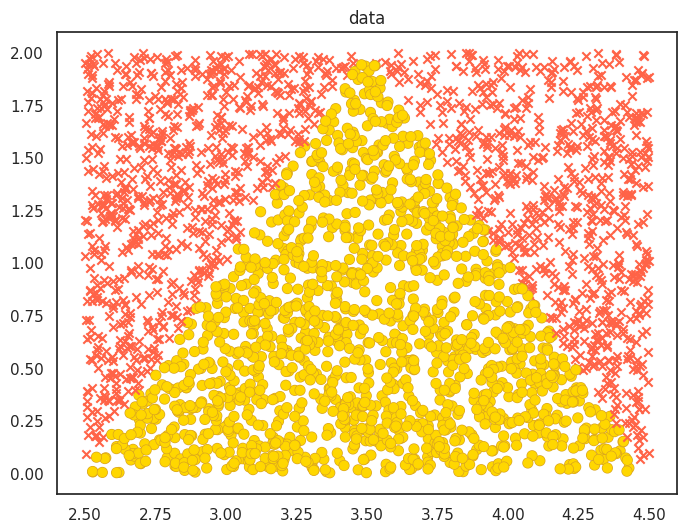

In [111]:
for i in range(len(X_train)):
    if y_train[i] == 1:
        plt.scatter(X_train[i][0], X_train[i][1], color='gold', path_effects=[pe.Stroke(linewidth=2, foreground='goldenrod'), pe.Normal()])
    else:
        plt.scatter(X_train[i][0], X_train[i][1], marker="x", color='tomato')

for i in range(len(X_test)):
    if y_test[i] == 1:
        plt.scatter(X_test[i][0], X_test[i][1], color='gold', path_effects=[pe.Stroke(linewidth=2, foreground='goldenrod'), pe.Normal()])
    else:
        plt.scatter(X_test[i][0], X_test[i][1], marker="x", color='tomato')

plt.title('data')
plt.show()

***

## $\Large\text{Analyse}$

$ \large\text{Как разделить эти два класса? Одна прямая тут не поможет, так как выборка линейно не разделима. } $ $ \large\text{Заметим, что двух прямых хватит для решения этой задачи. Пусть одна из них разделяет точки слева, а другая справа.}$ $ \large\text{Тогда знаки функций наших прямых будут показывать положения точек: если обе функции меньше нуля,}$ $\large\text{то точки класса 1, если знаки плюс-минус и минус-плюс то класс -1} $
$ \large\text{Случай с знаками минус-минус, опустим, так как точек в этой области в данных нет}$

<a href="https://www.youtube.com/watch?v=mwjQaNt8qxk&t=1943s" target="_blank">Подробнее</a>

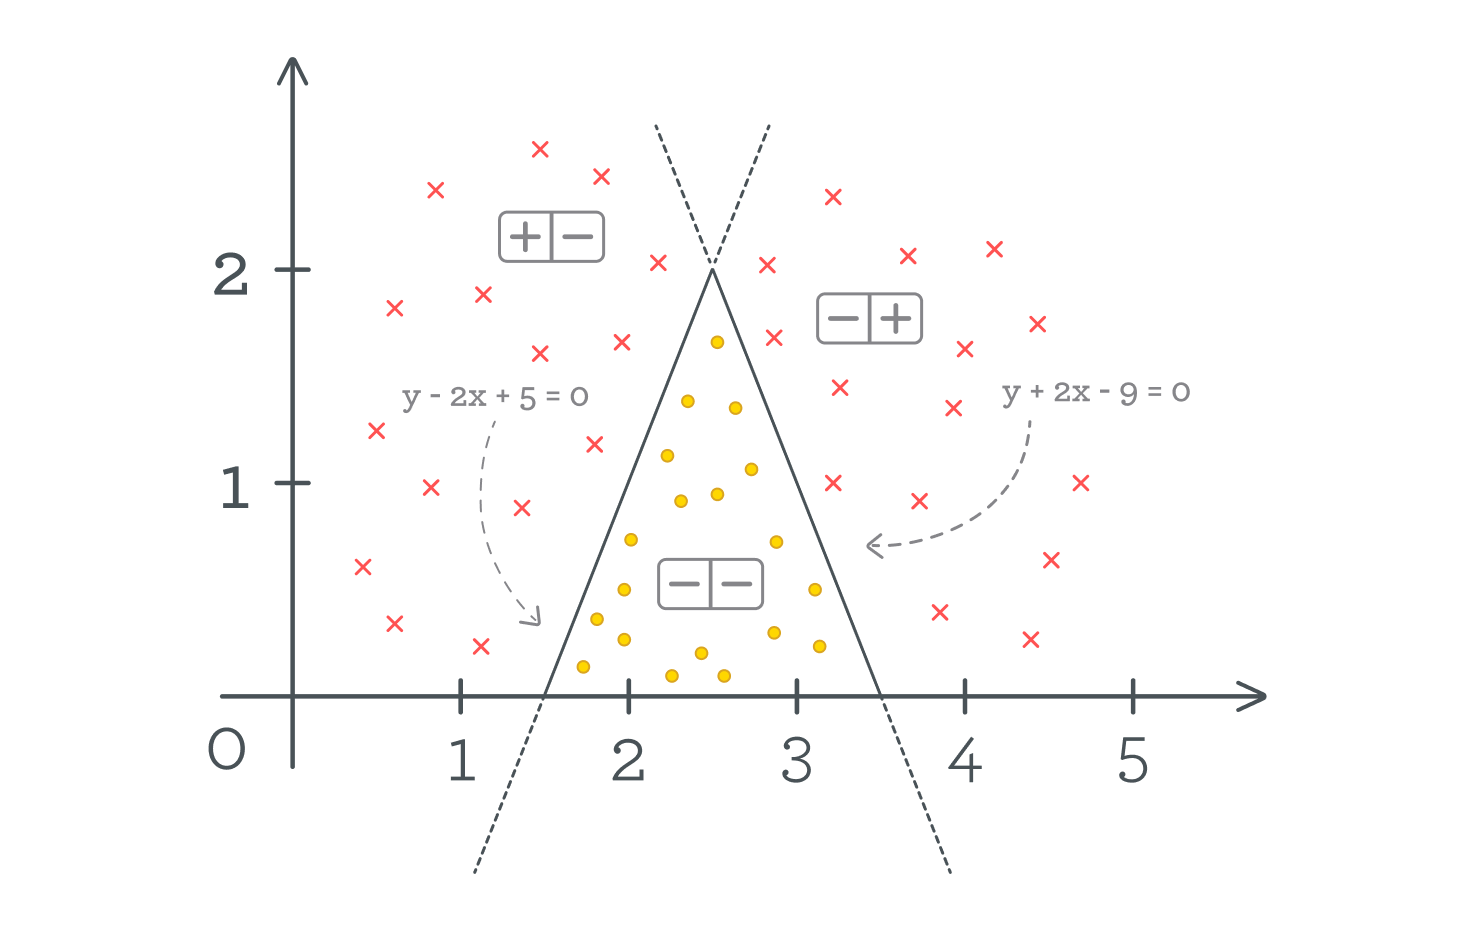
$\text{designed by}$ 
<a href="https://github.com/Dzagcoffee" target="_blank">Dzagcoffee</a>

***

$\large\text{Тогда, архитектура нашей нейронной сети, будет выглядеть так:}$

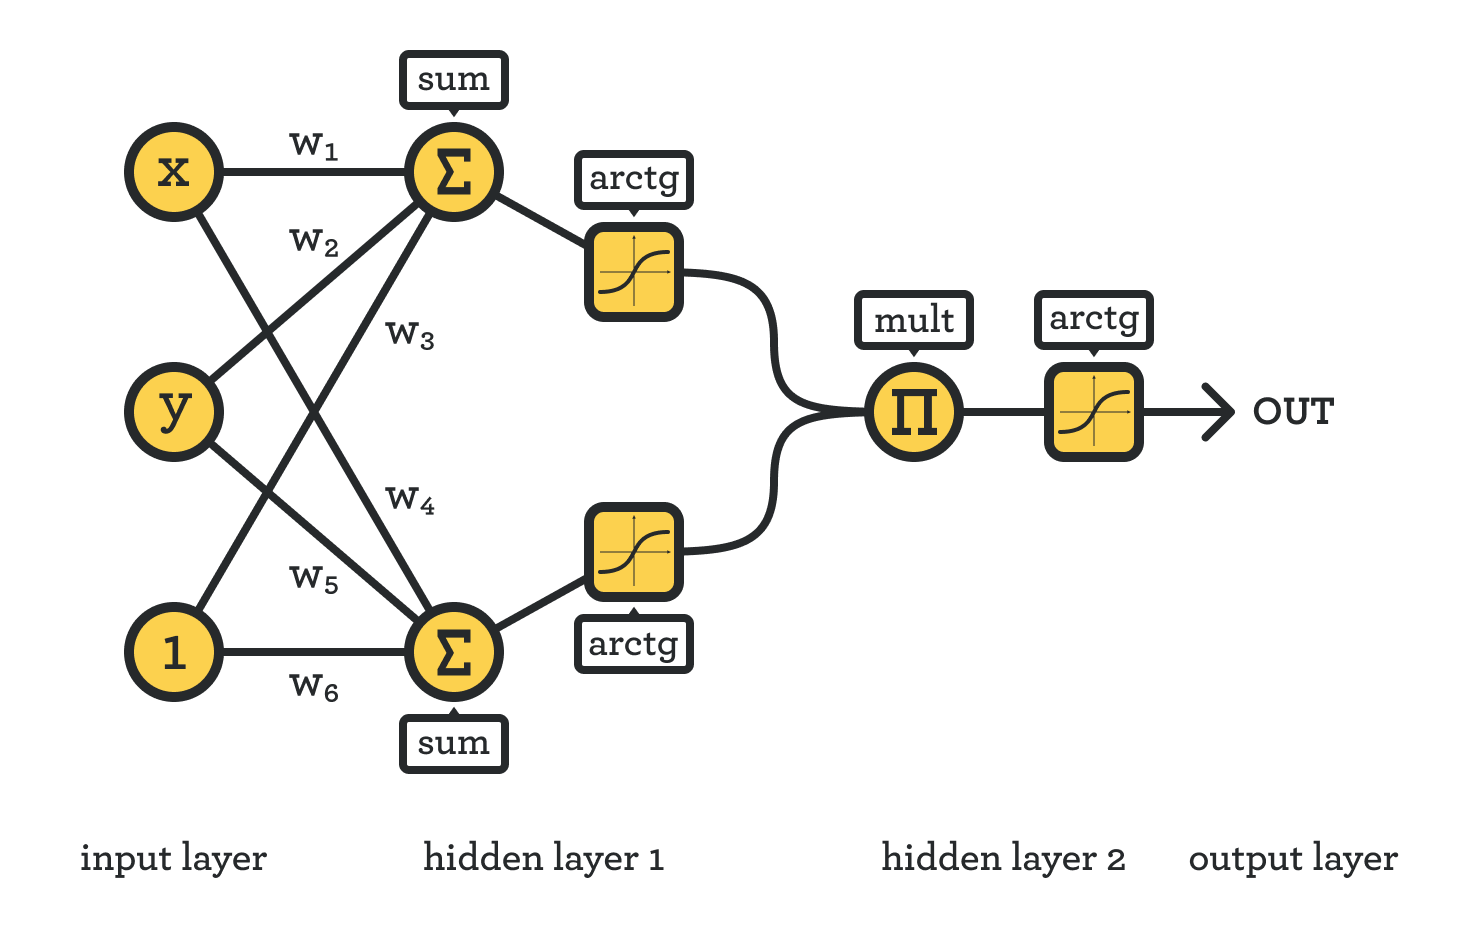
$\text{designed by}$ 
<a href="https://github.com/Dzagcoffee" target="_blank">Dzagcoffee</a>

$ w_1, w_2, w_3 \large\text{ - это коэфициенты первой прямой, а } w_4, w_5, w_6\large\text{ - второй, которые будут разделять наши точки.}$$\large\text{Тогда, если мы скалярно умножим вектор } \begin{pmatrix}
   x_0,y_0,1
\end{pmatrix} \large\text{ на вектор} \begin{pmatrix}
   w1, w2, w3
\end{pmatrix}\large\text{ - то как мы уже поняли,}$ $\large\text{посмотрев на знак этого числа,} $$\large\text{мы узнаем по какую сторону лежит точка с координатами } x_0, y_0 \large\text{ относительно прямой } $ 
$$  $$
 $$w_1 * x + w_2 * y + w_3,$$
\
$\large\text{аналогично и со второй прямой.}$ $\large\text{аналогично и с -1. Тогда перемножим выходы из первого скрытого слоя и посмотрев на знак,}$ $\large\text{мы поймём какого класса эта точка: плюс - значит 1, минус тогда к -1.}$ $\large\text{Также арктангенс (на выходном слое) поможет нам в лучшем понимании ответа: }$ $\large\text{чем ближе к нулю наш выход, тем меньше нейронная сеть уверена в классе объекта, если ближе к 1 она больше уверена к 1 и наоборот}$

$\large\text{Теперь подумаем над тем, какую функцию ошибки нам выбрать. Конечно, можно использовать RMSE, но так нейронная сеть больше}$ $\large\text{запомнит обучающую выборку, нежели что-то о ней поймёт.}$ $\large\text{Тогда воспользуемся следующей логикой, будем уменьшать кол-во неправильно угаданных объектов: }$ 
$\sum_i\max(0, -y_i\cdot\text{output}) \rightarrow \min \text{}$

## $\Large \text{Class Neural Network}$

In [112]:
class NeuralNetwork():
    def __init__(self, iterations=100, learning_rate=0.1,
                 silence='True', verbose=None):
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.silence = silence
        self.verbose = verbose
        
        self.init_weights()


    def init_weights(self):
        self.w_1 = np.random.uniform(-1, 1)
        self.w_2 = np.random.uniform(-1, 1)
        self.w_3 = np.random.uniform(-1, 1)
        self.w_4 = np.random.uniform(-1, 1)
        self.w_5 = np.random.uniform(-1, 1)
        self.w_6 = np.random.uniform(-1, 1)


    def activation_function(self, z):
        # tanh
        return 2 / (1 + np.exp(-z)) - 1


    def activation_derivative(self, z):
        # tanh derivative
        return (1 + self.activation_function(z)) * (1 - self.activation_function(z)) / 2


    def go_forward(self, x, y):
        first_layer_first_neuron = self.w_1 * x + self.w_2 * y + self.w_3
        first_layer_second_neuron = self.w_4 * x + self.w_5 * y + self.w_6

        second_layer_first_neuron = self.activation_function(first_layer_first_neuron)
        second_layer_second_neuron = self.activation_function(first_layer_second_neuron)

        third_layer = second_layer_first_neuron * second_layer_second_neuron

        output = self.activation_function(third_layer)

        return first_layer_first_neuron, first_layer_second_neuron, \
        second_layer_first_neuron, second_layer_second_neuron, \
        third_layer, output


    def computeGradient(self, 
                        first_layer_first_neuron, first_layer_second_neuron,
                        second_layer_first_neuron, second_layer_second_neuron,
                        third_layer, x, y, y_real):
        grad = [0, 0, 0, 0, 0, 0]
        grad[0] = - 1 * y_real * self.activation_derivative(third_layer) * \
         self.activation_function(first_layer_second_neuron) * self.activation_derivative(first_layer_first_neuron) * x
        grad[1] = - 1 * y_real * self.activation_derivative(third_layer) * \
         self.activation_function(first_layer_second_neuron) * self.activation_derivative(first_layer_first_neuron) * y
        grad[2] = - 1 * y_real * self.activation_derivative(third_layer) * \
         self.activation_function(first_layer_second_neuron) * self.activation_derivative(first_layer_first_neuron) * 1 
        grad[3] = - 1 * y_real * self.activation_derivative(third_layer) * \
         self.activation_function(first_layer_first_neuron) * self.activation_derivative(first_layer_second_neuron) * x 
        grad[4] = - 1 * y_real * self.activation_derivative(third_layer) * \
         self.activation_function(first_layer_first_neuron) * self.activation_derivative(first_layer_second_neuron) * y
        grad[5] = - 1 * y_real * self.activation_derivative(third_layer) * \
         self.activation_function(first_layer_first_neuron) * self.activation_derivative(first_layer_second_neuron) * 1
        
        return grad


    def fit(self, X, y, silence, verbose):
        for i in range(self.iterations):
            for j in range(len(X)):
                y_real = y[j]

                first_layer_first_neuron, first_layer_second_neuron, \
                second_layer_first_neuron, second_layer_second_neuron, \
                third_layer, output = self.go_forward(X[j][0], X[j][1])
                loss = max(0, - output * y_real)
                
                if loss != 0:
                    grad = self.computeGradient(first_layer_first_neuron, first_layer_second_neuron,
                        second_layer_first_neuron, second_layer_second_neuron,
                        third_layer, X[j][0], X[j][1], y_real)
                    
                    self.w_1 -= self.learning_rate * grad[0]
                    self.w_2 -= self.learning_rate * grad[1]
                    self.w_3 -= self.learning_rate * grad[2]
                    self.w_4 -= self.learning_rate * grad[3]
                    self.w_5 -= self.learning_rate * grad[4]
                    self.w_6 -= self.learning_rate * grad[5]
            
            if silence=='False' and i % verbose == 0:
                self.print_progress(X, y, i)


    def print_progress(self, X, y, epoch):
            y_pred = []
            for k in range(len(X)):
                y_pred.append(nn.predict([X[k][0], X[k][1]]))
                if y_pred[k] > 0:
                    y_pred[k] = 1
                else:
                    y_pred[k] = -1
            print('epoch:', epoch, ' ', 'accuracy:', accuracy_score(y, y_pred))


    def predict(self, x):
        _, _, _, _, _, prediction = self.go_forward(x[0], x[1])
        return prediction

## $\Large\text{Fitting and predictions}$

In [113]:
nn = NeuralNetwork(iterations=1000, learning_rate=0.1)
nn.fit(X_train, y_train, silence='False', verbose=50)

epoch: 0   accuracy: 0.6819047619047619
epoch: 50   accuracy: 0.9871428571428571
epoch: 100   accuracy: 0.888095238095238
epoch: 150   accuracy: 0.8971428571428571
epoch: 200   accuracy: 0.9871428571428571
epoch: 250   accuracy: 0.8990476190476191
epoch: 300   accuracy: 0.8966666666666666
epoch: 350   accuracy: 0.89
epoch: 400   accuracy: 0.8957142857142857
epoch: 450   accuracy: 0.9823809523809524
epoch: 500   accuracy: 0.9871428571428571
epoch: 550   accuracy: 0.9757142857142858
epoch: 600   accuracy: 0.9909523809523809
epoch: 650   accuracy: 0.900952380952381
epoch: 700   accuracy: 0.8857142857142857
epoch: 750   accuracy: 0.9085714285714286
epoch: 800   accuracy: 0.9080952380952381
epoch: 850   accuracy: 0.9780952380952381
epoch: 900   accuracy: 0.9047619047619048
epoch: 950   accuracy: 0.9914285714285714


## $\Large\text{Result}$

$\large\text{Теперь посмотрим на предсказания нашей нейронной сети. Будем говорить, что точка класса 1 (жёлтые)}$ $\large\text{если наш предикт больше нуля и класса -1 (красные) если меньше. Также выведем наши прямые,}$ $\large\text{которые правильно разделяют наши точки.}$

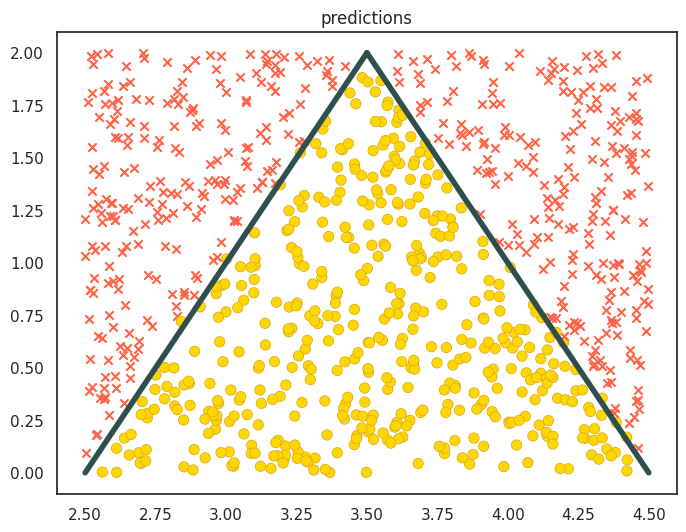

In [114]:
plt.plot([2.5, 3.5], [0, 2], color='darkslategray', linewidth=4)
plt.plot([4.5, 3.5], [0, 2], color='darkslategray', linewidth=4)

for i in range(len(X_test)):
    pred = nn.predict(X_test[i])

    if pred > 0:
        plt.scatter(X_test[i][0], X_test[i][1], color='gold', path_effects=[pe.Stroke(linewidth=2, foreground='goldenrod'), pe.Normal()])
    else:
        plt.scatter(X_test[i][0], X_test[i][1], marker="x", color='tomato')

plt.title('predictions')
plt.show()